<a href="https://colab.research.google.com/github/jeonjunhyeok/Python-/blob/main/%EB%85%BC%EB%A6%AC%EC%99%80_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%EA%B8%B0%EB%A7%90_%EA%B3%BC%EC%A0%9C_3%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

thalach       5
trestbps      4
chol          1
Unnamed: 0    0
age           0
sex           0
cp            0
fbs           0
restecg       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
dtype: int64
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 120)               1800      
                                                                 
 dense_21 (Dense)            (None, 60)                7260      
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_22 (Dense)            (None, 30)                1830      
                                                                 
 dense_23 (Dense)            (None, 2)                 62        
               

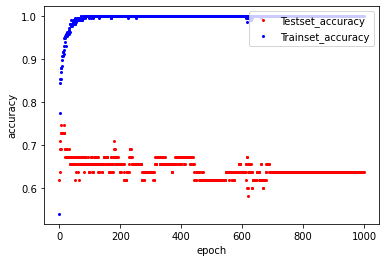

1/1 [==============================] - 0s 22ms/step - loss: 3.5183 - accuracy: 0.9032
Test accuracy: 0.9032257795333862
Epoch 1/1000
5/5 [==============================] - 0s 23ms/step - loss: 1.1171e-05 - accuracy: 1.0000 - val_loss: 6.3080 - val_accuracy: 0.6364
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 5.5792e-05 - accuracy: 1.0000 - val_loss: 6.3007 - val_accuracy: 0.6364
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 1.4642e-05 - accuracy: 1.0000 - val_loss: 6.2959 - val_accuracy: 0.6364
Epoch 4/1000
5/5 [==============================] - 0s 13ms/step - loss: 3.1131e-05 - accuracy: 1.0000 - val_loss: 6.2921 - val_accuracy: 0.6364
Epoch 5/1000
5/5 [==============================] - 0s 7ms/step - loss: 6.8498e-06 - accuracy: 1.0000 - val_loss: 6.2897 - val_accuracy: 0.6364
Epoch 6/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.3149e-05 - accuracy: 1.0000 - val_loss: 6.2878 - val_accuracy: 0.6364
Epoch 7/1000

In [ ]:
#숙제 1번
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import  load_model

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

Heart=pd.read_csv("https://raw.githubusercontent.com/jeonjunhyeok/Jeonjunhyeok/main/heart%20disease%20classification%20dataset.csv")

print(Heart.isnull().sum().sort_values(ascending=False).head(14))
Heart=Heart.fillna(Heart.mean(numeric_only=True))

X=Heart.iloc[:,1:14]
X=pd.get_dummies(X)
Y=Heart.iloc[:,14]
Y=pd.get_dummies(Y)

X=(X -X.mean(numeric_only=True))/X.std(numeric_only=True)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)

model = Sequential()
model.add(Dense(120, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer ='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,Y_train, validation_split=0.2,verbose=0, epochs=1000, batch_size=50)

hist_df=pd.DataFrame(history.history)
hist_df
y_vaccuracy=hist_df['val_accuracy']
y_accuracy=hist_df['accuracy']

x_len = np.arange(len(y_accuracy))
plt.plot(x_len, y_vaccuracy, "o", c="red", markersize=2, label='Testset_accuracy')
plt.plot(x_len, y_accuracy, "o", c="blue", markersize=2, label='Trainset_accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

score=model.evaluate(X_test,Y_test)
print('Test accuracy:',score[1])

early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=20)
modelpath="./data/model/bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_accuracy', verbose=0, save_best_only=True)
history=model.fit(X_train, Y_train, epochs=1000, batch_size=50, validation_split=0.2, verbose=1, callbacks=[early_stopping_callback,checkpointer])

In [ ]:
#숙제 2번
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

Heart=pd.read_csv("https://raw.githubusercontent.com/jeonjunhyeok/Jeonjunhyeok/main/heart%20disease%20classification%20dataset.csv")

print(Heart.isnull().sum().sort_values(ascending=False).head(14))
Heart=Heart.fillna(Heart.mean(numeric_only=True))

X=Heart.iloc[:,1:14]
X=pd.get_dummies(X)
Y=Heart.iloc[:,14]
Y=pd.get_dummies(Y)

X=(X -X.mean(numeric_only=True))/X.std(numeric_only=True)

k=6
kfold=KFold(n_splits=k, shuffle=True)
acc_score=[]

def model_fn():
  model=Sequential()
  model.add(Dense(30, input_dim=14,activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  return model

for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  Y_train, Y_test = Y.iloc[train_index],Y.iloc[test_index]

  model=model_fn()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

  accuracy=model.evaluate(X_test, Y_test)[1]
  acc_score.append(accuracy)

avg_acc_score=sum(acc_score)/k

print('정확도: ',acc_score)
print('평균: ', avg_acc_score)

thalach       5
trestbps      4
chol          1
Unnamed: 0    0
age           0
sex           0
cp            0
fbs           0
restecg       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
dtype: int64
2/2 [==============================] - 0s 5ms/step - loss: 1.1291 - accuracy: 0.8400
정확도:  [0.8235294222831726, 0.8823529481887817, 0.7450980544090271, 0.8199999928474426, 0.800000011920929, 0.8399999737739563]
평균:  0.8184967339038849
